In [4]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['figure.figsize'] = [3.5, 3]
matplotlib.rcParams['axes.grid'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.insert(0, '../')

from lib_data import *
from lib_nn_dpe import NN_dpe

In [6]:
load_workspace(vars(), '../data/20190821-051552-mnist_xs')
load_workspace(vars(), '../data/20200130-100802-mnist_config')

c:\users\canli\.venv\py37\lib\site-packages\dill\_dill.py:473: UserWarning: This figure was saved with matplotlib version 3.1.1 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)


Loaded: In, Out, weights, train_images, train_labels, test_images, test_labels, g, img_idx, image, vectors, outputs, software, c, x, y, mat_contents, finalGconv, g1, g2, linear_factors_conv, xs, acc, result, x1, 
Loaded: xs, new_lin_cor_fc1, new_lin_cor_fc2, lin_cor_conv, finalGfc, finalGconv, weights, 


In [7]:
del train_images
del train_labels
# del test_images
# del test_labels
del xs

In [8]:
from lib_ecc import *

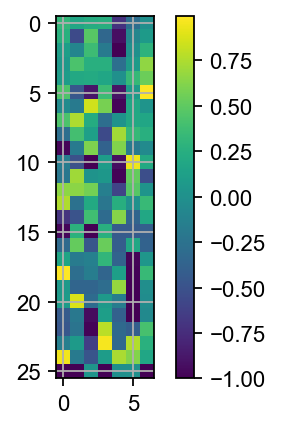

In [6]:
nn = NN_dpe(weights)
nn.Gratio = 100e-6
plt.imshow(nn.Mconv); plt.colorbar()

7 4.0 7.0
The number of redundancy column is chosen to be the smallest even number 8
(26, 15)


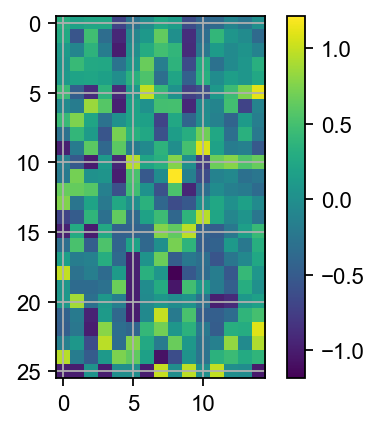

In [7]:
from dpeECC import dpeECC

delta = 1
Delta = 8 * delta

m = nn.Mconv.shape[0]
k = nn.Mconv.shape[1]

print(k, np.ceil(np.sqrt(k+1))+1, 2*k/(np.floor(Delta/(2*delta))-2))

ecc = dpeECC(nn.Mconv, delta, Delta)
M_conv_ecc = ecc.encode()

print('The number of redundancy column is chosen to be the smallest even number', ecc.r)
print(M_conv_ecc.shape)

plt.imshow(M_conv_ecc); plt.colorbar()

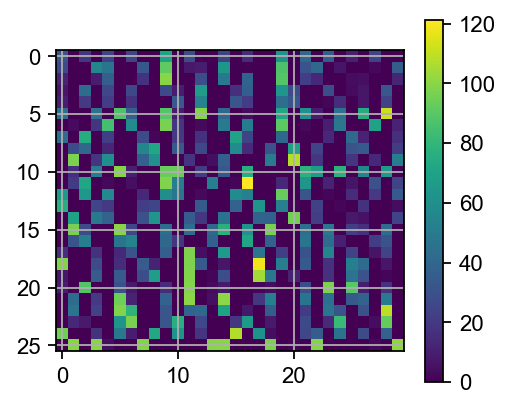

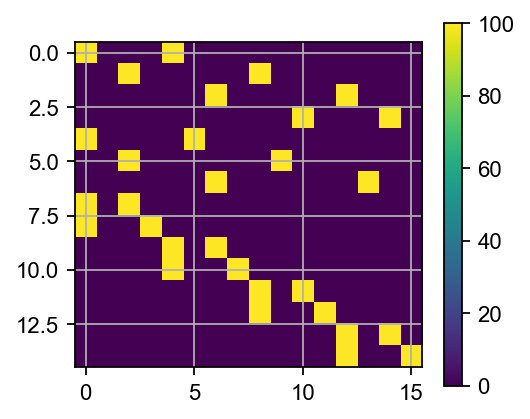

In [8]:
G_conv_ecc = weight2conductance(M_conv_ecc)
G_parity_ecc = weight2conductance(ecc.H.T)

plt.figure(1)
plt.imshow(G_conv_ecc * 1e6); plt.colorbar()

plt.figure(2)
plt.imshow(G_parity_ecc * 1e6); plt.colorbar()

# Load data

In [12]:
# dir_data = '/Volumes/T7 Touch/SuperT/' # mac
dir_data = 'X:/SuperT/'

load_workspace(vars(), filename=dir_data+ '20200627-001327-inject_noise_uniform-10')

Loaded: In, Out, weights, test_images, test_labels, g, img_idx, image, vectors, outputs, software, c, x, y, mat_contents, finalGconv, g1, g2, linear_factors_conv, acc, result, x1, new_lin_cor_fc1, new_lin_cor_fc2, lin_cor_conv, finalGfc, delta, Delta, m, k, M_conv_ecc, G_conv_ecc, G_parity_ecc, Gtarget, rs, cs, Msel, gdiff, i, N_IMG, vectors_list, output_list, img, output, output_soft, output_cor, gain_list, output_gain, gain, gain_th, gain_value, lin_cor_gain, th_rel, lin_cor, idx, y1_raw_list, y1_ecc_list, y1_soft_list, n_detected, n_corrected, n_other, y_preds, y1, y1_soft, y1_corrected, y1_noise_list, vectors_expand, vectors_noise, y1_noise, y1_raw, y1_ecc, data, y1_noise_list0, y1_noise0, vectors_noise0, 


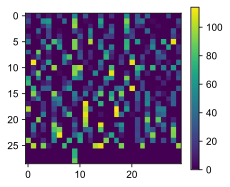

In [28]:
%config InlineBackend.figure_formats = ['svg']

plt.imshow(g[rs: rs+G_conv_ecc.shape[0] + 3, 
             cs: cs+G_conv_ecc.shape[1]] * 1e6)
plt.colorbar()
plt.grid(False)

In [21]:
G_conv_ecc.shape

(26, 30)

Text(0, 0.5, 'Without artifitial current')

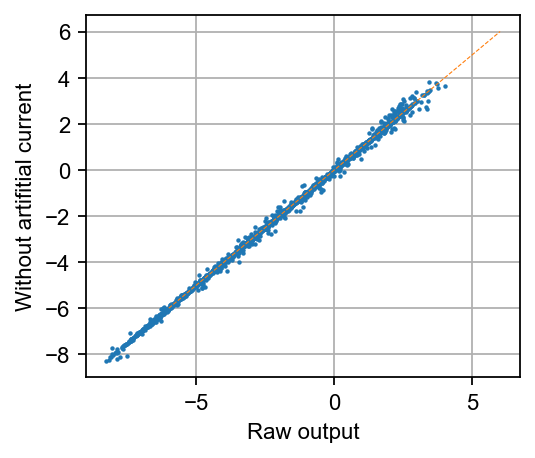

In [13]:
plt.figure(figsize=(3.5,3))

plt.plot(y1_raw.reshape(-1, 15)[:,4].reshape(-1), 
         y1_noise0.reshape(-1, 15)[:,4].reshape(-1), '.', ms=2)

plt.plot([-6, 6], [-6, 6], '--', lw=0.5)

plt.xlabel('Raw output')
plt.ylabel('Without artifitial current')

Text(0, 0.5, 'With artifitial current')

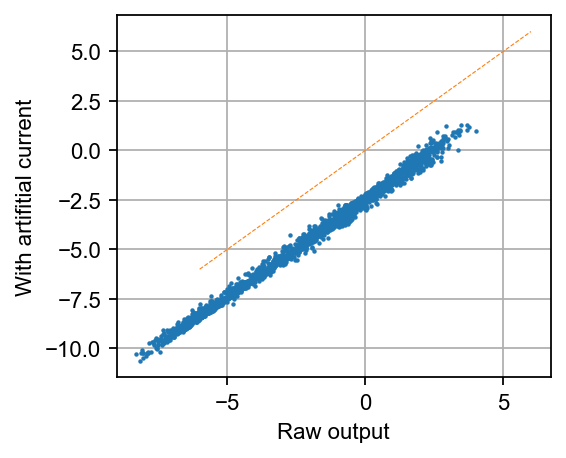

In [14]:
plt.figure(figsize=(3.5,3))

plt.plot(y1_raw.reshape(-1, 15)[:,4].reshape(-1), 
         y1_noise.reshape(-1, 15)[:,4].reshape(-1), '.', ms=2)

plt.plot([-6, 6], [-6, 6], '--', lw=0.5)

plt.xlabel('Raw output')
plt.ylabel('With artifitial current')

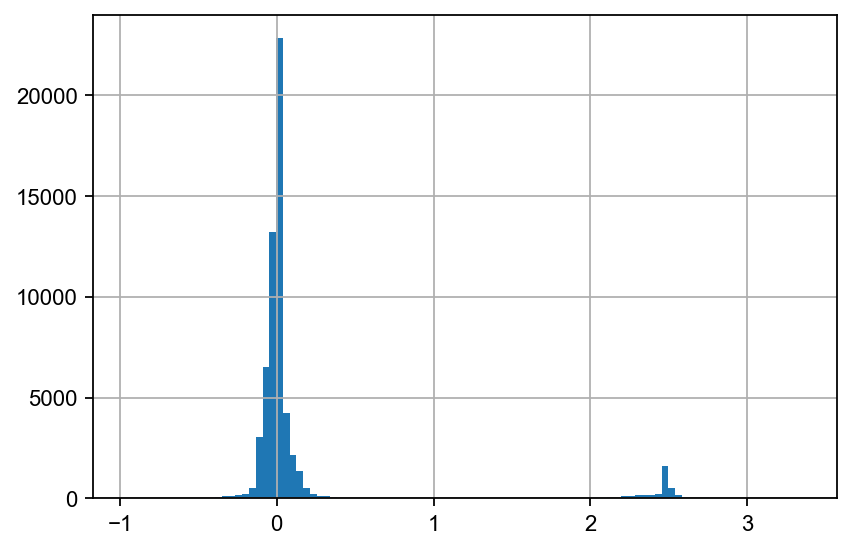

In [15]:
_ = plt.hist((y1_raw - y1_noise ).reshape(-1, 15)[:,:].reshape(-1), 100)
# plt.yscale('log')

# Delta

In [29]:
from lib_ecc import *

In [30]:
y1_raw = np.array(y1_noise_list).reshape(-1, 15)
y1_soft = np.array(y1_soft_list).reshape(-1, 15)
# y1_ecc = np.array(y1_ecc_list).reshape()

In [33]:
delta_list = np.arange(0.05, 1.05, 0.05)

y1_ecc_list_list = []

for delta in tqdm(delta_list):
    y1_ecc_list = []
    
    Delta = 8 * delta
    ecc = dpeECC(nn.Mconv, delta, Delta)

#     for y1_raw in y1_raw_list:
    y1_ecc_list_list.append( correct_ecc(y1_raw, ecc) )
        
#     y1_ecc_list_list.append(y1_ecc_list)

100%|█████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.12it/s]


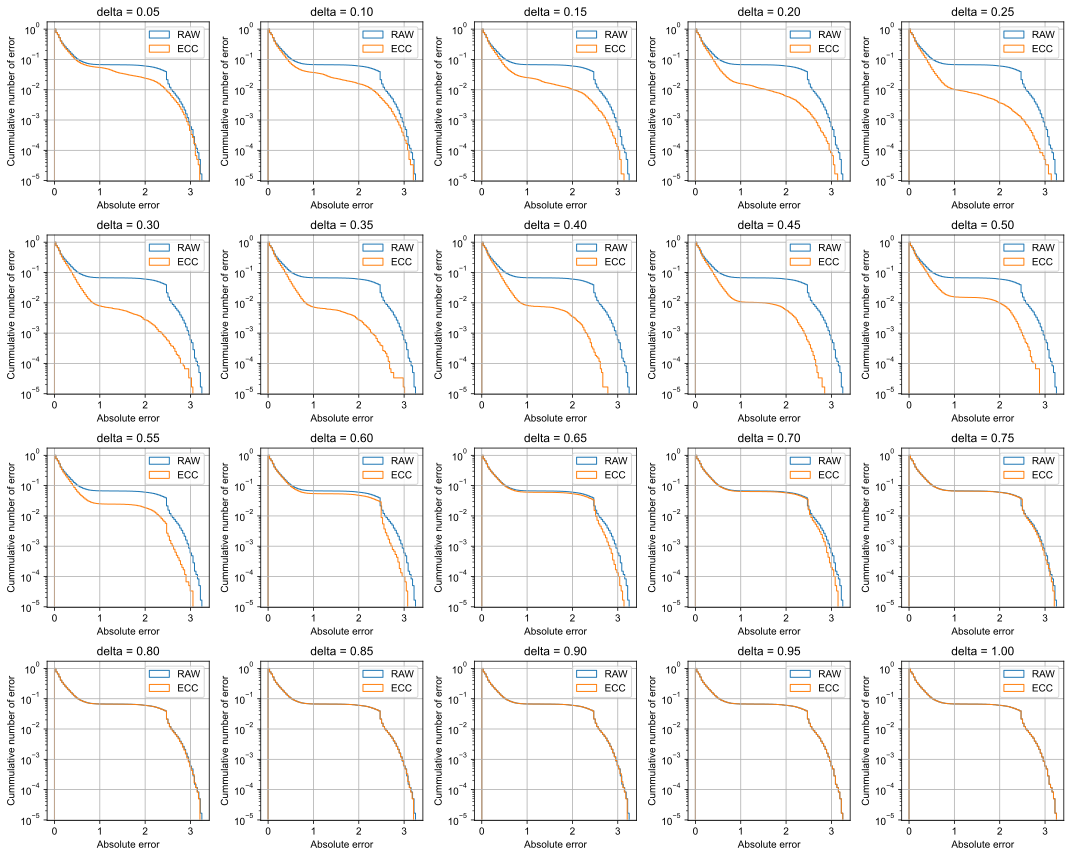

In [40]:
%config InlineBackend.figure_formats = ['svg']
# output_soft = vectors.T @ G_conv_ecc / nn.Gratio
# y1_soft = output_soft[:, ::2] - output_soft[:, 1::2]

plt.figure(figsize=(15,12))

# for i in range(len(y1_list)):
for i in range(20):
    
    plt.subplot(4,5,i+1)

#     y1_raw = y1_raw_list[0]
    y1_ecc = y1_ecc_list_list[i]


    err_raw = (y1_raw - y1_soft)[:,:].reshape(-1)
    err_ecc = (y1_ecc - y1_soft)[:,:].reshape(-1)


    _ = plt.hist(abs(err_raw), density=True, histtype='step', cumulative=-1,
            label='RAW', bins=100)

    _ = plt.hist(abs(err_ecc), density=True, histtype='step', cumulative=-1,
            label='ECC', bins=100)

    plt.legend()

    plt.yscale('log')
    plt.xlabel('Absolute error')
    plt.ylabel('Cummulative number of error')
    
    plt.title(f'delta = {delta_list[i]:.2f}')
    
plt.tight_layout()

# CNN

In [9]:
# dir_data = '/Volumes/T7 Touch/SuperT/' # mac
dir_data = 'X:/SuperT/'

load_workspace(vars(), filename=dir_data+ '20200629-054603-cnn-inject-noise-random-4500')

Loaded: In, Out, weights, test_images, test_labels, g, img_idx, image, vectors, outputs, software, c, x, y, mat_contents, finalGconv, g1, g2, linear_factors_conv, acc, result, x1, new_lin_cor_fc1, new_lin_cor_fc2, lin_cor_conv, finalGfc, delta, Delta, m, k, M_conv_ecc, G_conv_ecc, G_parity_ecc, Gtarget, rs, cs, Msel, gdiff, i, N_IMG, vectors_list, output_list, img, output, output_soft, output_cor, gain_list, output_gain, gain, gain_th, gain_value, lin_cor_gain, th_rel, lin_cor, idx, y1_raw_list, y1_ecc_list, y1_soft_list, n_detected, n_corrected, n_other, y_preds, y1, y1_soft, y1_corrected, y1_noise_list, vectors_expand, vectors_noise, y1_noise, y1_raw, y1_ecc, data, y1_noise_list0, y1_noise0, vectors_noise0, delta_list, y1_ecc_list_list, err_raw, err_ecc, y_preds_raw, y_preds_noise, y_preds_ecc, 


In [10]:
print(f'Accuracy={np.mean(test_labels[:i] == np.array(y_preds_raw))*100:.2f}%|' + \
                         f'{np.mean(test_labels[:i] == np.array(y_preds_noise))*100:.2f}%->' + \
                         f'{np.mean(test_labels[:i] == np.array(y_preds_ecc))*100:.2f}%)')

Accuracy=96.62%|93.16%->96.62%)


In [49]:
N_IMG = len(y1_raw_list)

pbar = tqdm(zip(test_images[:N_IMG], test_labels[:N_IMG]), total=N_IMG)

y_preds_raw = []
y_preds_noise = []
y_preds_ecc = []

i = 0
for img, lab in pbar:
    
#     vectors = nn._conv_flattern(img)
    
    # Raw
    y1 = y1_raw_list[i]
    y1_soft = y1_soft_list[i]
    ## Raw next layer
    k = nn.Gconv.shape[1] //2
    x = y1[:, :k]
    y_pred = dense(x, nn, finalGfc)
    y_preds_raw.append(y_pred.copy())
    
    ## Inject noise
    y1_noise = y1_noise_list[i]
    ## Next layer noise
    x = y1_noise[:, :k]
    
    y_pred = dense(x, nn, finalGfc)
    y_preds_noise.append(y_pred)
    
    ## Next layer ECC
    y1_corrected = correct_ecc(y1_noise, ecc)
    y1_ecc_list.append( y1_corrected.copy() )
    
    x = y1[:, :k]
    
    y_pred = dense(x, nn, finalGfc)
    y_preds_ecc.append(y_pred.copy())

    i+=1

    pbar.set_description(f'Accuracy={np.mean(test_labels[:i] == np.array(y_preds_raw))*100:.2f}%|' + \
                         f'{np.mean(test_labels[:i] == np.array(y_preds_noise))*100:.2f}%->' + \
                         f'{np.mean(test_labels[:i] == np.array(y_preds_ecc))*100:.2f}%)')

Accuracy=96.62%|93.16%->96.62%): 100%|████████████████████████| 4500/4500 [01:06<00:00, 67.48it/s]


## Delta

In [15]:
delta_list = np.arange(0.02, 0.75, 0.02)
acc_list = []

m = nn.Mconv.shape[0]
k = nn.Mconv.shape[1]
    
for delta in tqdm(delta_list):
    print(delta)
    Delta = 8 * delta

    ecc = dpeECC(nn.Mconv, delta, Delta)
    
    N_IMG = len(y1_raw_list)

#     pbar = tqdm(zip(test_images[:N_IMG], test_labels[:N_IMG]), total=N_IMG)

    y_preds_raw = []
    y_preds_noise = []
    y_preds_ecc = []

    i = 0
    for img, lab in zip(test_images[:N_IMG], test_labels[:N_IMG]):
        # Raw
        y1 = y1_raw_list[i]
        y1_soft = y1_soft_list[i]
        ## Raw next layer
        k = nn.Gconv.shape[1] //2
        x = y1[:, :k]
        y_pred = dense(x, nn, finalGfc)
        y_preds_raw.append(y_pred.copy())

        ## Inject noise
        y1_noise = y1_noise_list[i]
        ## Next layer noise
        x = y1_noise[:, :k]

        y_pred = dense(x, nn, finalGfc)
        y_preds_noise.append(y_pred)

        ## Next layer ECC
        y1_corrected = correct_ecc(y1_noise, ecc)
        y1_ecc_list.append( y1_corrected.copy() )

        x = y1_corrected[:, :k]

        y_pred = dense(x, nn, finalGfc)
        y_preds_ecc.append(y_pred.copy())

        i+=1

#         pbar.set_description(f'Accuracy={np.mean(test_labels[:i] == np.array(y_preds_raw))*100:.2f}%|' + \
#                              f'{np.mean(test_labels[:i] == np.array(y_preds_noise))*100:.2f}%->' + \
#                              f'{np.mean(test_labels[:i] == np.array(y_preds_ecc))*100:.2f}%)')
        
    acc_list.append(np.mean(test_labels[:i] == np.array(y_preds_ecc)))
    print(f'Accuracy={np.mean(test_labels[:i] == np.array(y_preds_raw))*100:.2f}%|' + \
                             f'{np.mean(test_labels[:i] == np.array(y_preds_noise))*100:.2f}%->' + \
                             f'{np.mean(test_labels[:i] == np.array(y_preds_ecc))*100:.2f}%)')

  0%|                                                                      | 0/37 [00:00<?, ?it/s]

0.02


  3%|█▋                                                            | 1/37 [00:51<30:58, 51.62s/it]

Accuracy=96.62%|93.16%->94.00%)
0.04


  5%|███▎                                                          | 2/37 [01:42<30:01, 51.46s/it]

Accuracy=96.62%|93.16%->94.33%)
0.06


  8%|█████                                                         | 3/37 [02:32<28:51, 50.94s/it]

Accuracy=96.62%|93.16%->94.82%)
0.08


 11%|██████▋                                                       | 4/37 [03:23<27:57, 50.83s/it]

Accuracy=96.62%|93.16%->95.24%)
0.1


 14%|████████▍                                                     | 5/37 [04:15<27:17, 51.19s/it]

Accuracy=96.62%|93.16%->95.38%)
0.12000000000000001


 16%|██████████                                                    | 6/37 [05:05<26:19, 50.96s/it]

Accuracy=96.62%|93.16%->95.64%)
0.13999999999999999


 19%|███████████▋                                                  | 7/37 [05:56<25:31, 51.04s/it]

Accuracy=96.62%|93.16%->95.96%)
0.16


 22%|█████████████▍                                                | 8/37 [06:47<24:42, 51.11s/it]

Accuracy=96.62%|93.16%->96.04%)
0.18


 24%|███████████████                                               | 9/37 [07:35<23:19, 49.99s/it]

Accuracy=96.62%|93.16%->96.04%)
0.19999999999999998


 27%|████████████████▍                                            | 10/37 [08:22<22:08, 49.21s/it]

Accuracy=96.62%|93.16%->96.31%)
0.22


 30%|██████████████████▏                                          | 11/37 [09:10<21:08, 48.80s/it]

Accuracy=96.62%|93.16%->96.42%)
0.24


 32%|███████████████████▊                                         | 12/37 [10:00<20:25, 49.00s/it]

Accuracy=96.62%|93.16%->96.27%)
0.26


 35%|█████████████████████▍                                       | 13/37 [10:43<18:53, 47.25s/it]

Accuracy=96.62%|93.16%->96.20%)
0.28


 38%|███████████████████████                                      | 14/37 [11:24<17:25, 45.45s/it]

Accuracy=96.62%|93.16%->96.24%)
0.30000000000000004


 41%|████████████████████████▋                                    | 15/37 [12:03<15:55, 43.42s/it]

Accuracy=96.62%|93.16%->96.38%)
0.32


 43%|██████████████████████████▍                                  | 16/37 [12:41<14:37, 41.79s/it]

Accuracy=96.62%|93.16%->96.38%)
0.34


 46%|████████████████████████████                                 | 17/37 [13:18<13:31, 40.55s/it]

Accuracy=96.62%|93.16%->96.29%)
0.36000000000000004


 49%|█████████████████████████████▋                               | 18/37 [14:02<13:10, 41.59s/it]

Accuracy=96.62%|93.16%->96.24%)
0.38


 51%|███████████████████████████████▎                             | 19/37 [14:37<11:53, 39.66s/it]

Accuracy=96.62%|93.16%->96.07%)
0.4


 54%|████████████████████████████████▉                            | 20/37 [15:14<10:58, 38.76s/it]

Accuracy=96.62%|93.16%->95.84%)
0.42000000000000004


 57%|██████████████████████████████████▌                          | 21/37 [15:45<09:41, 36.32s/it]

Accuracy=96.62%|93.16%->95.64%)
0.44


 59%|████████████████████████████████████▎                        | 22/37 [16:12<08:25, 33.71s/it]

Accuracy=96.62%|93.16%->95.58%)
0.46


 62%|█████████████████████████████████████▉                       | 23/37 [16:39<07:22, 31.61s/it]

Accuracy=96.62%|93.16%->95.20%)
0.48000000000000004


 65%|███████████████████████████████████████▌                     | 24/37 [17:04<06:23, 29.48s/it]

Accuracy=96.62%|93.16%->95.16%)
0.5


 68%|█████████████████████████████████████████▏                   | 25/37 [17:27<05:32, 27.68s/it]

Accuracy=96.62%|93.16%->95.02%)
0.52


 70%|██████████████████████████████████████████▊                  | 26/37 [17:49<04:44, 25.83s/it]

Accuracy=96.62%|93.16%->94.67%)
0.54


 73%|████████████████████████████████████████████▌                | 27/37 [18:10<04:04, 24.41s/it]

Accuracy=96.62%|93.16%->94.36%)
0.56


 76%|██████████████████████████████████████████████▏              | 28/37 [18:33<03:36, 24.05s/it]

Accuracy=96.62%|93.16%->94.24%)
0.5800000000000001


 78%|███████████████████████████████████████████████▊             | 29/37 [19:02<03:25, 25.71s/it]

Accuracy=96.62%|93.16%->93.98%)
0.6


 81%|█████████████████████████████████████████████████▍           | 30/37 [19:24<02:51, 24.49s/it]

Accuracy=96.62%|93.16%->93.82%)
0.62


 84%|███████████████████████████████████████████████████          | 31/37 [19:45<02:21, 23.52s/it]

Accuracy=96.62%|93.16%->93.56%)
0.64


 86%|████████████████████████████████████████████████████▊        | 32/37 [20:04<01:50, 22.07s/it]

Accuracy=96.62%|93.16%->93.40%)
0.66


 89%|██████████████████████████████████████████████████████▍      | 33/37 [20:23<01:24, 21.02s/it]

Accuracy=96.62%|93.16%->93.36%)
0.68


 92%|████████████████████████████████████████████████████████     | 34/37 [20:41<01:00, 20.13s/it]

Accuracy=96.62%|93.16%->93.24%)
0.7000000000000001


 92%|████████████████████████████████████████████████████████     | 34/37 [20:48<01:50, 36.72s/it]


MemoryError: Unable to allocate 46.9 KiB for an array with shape (400, 15) and data type float64

In [16]:
acc_list

[0.94,
 0.9433333333333334,
 0.9482222222222222,
 0.9524444444444444,
 0.9537777777777777,
 0.9564444444444444,
 0.9595555555555556,
 0.9604444444444444,
 0.9604444444444444,
 0.9631111111111111,
 0.9642222222222222,
 0.9626666666666667,
 0.962,
 0.9624444444444444,
 0.9637777777777777,
 0.9637777777777777,
 0.9628888888888889,
 0.9624444444444444,
 0.9606666666666667,
 0.9584444444444444,
 0.9564444444444444,
 0.9557777777777777,
 0.952,
 0.9515555555555556,
 0.9502222222222222,
 0.9466666666666667,
 0.9435555555555556,
 0.9424444444444444,
 0.9397777777777778,
 0.9382222222222222,
 0.9355555555555556,
 0.934,
 0.9335555555555556,
 0.9324444444444444]

In [17]:
save_workspace({'delta_list': delta_list, 'acc_list': acc_list}, filename='random-noise-4500')

Saving delta_list(<class 'numpy.ndarray'>), acc_list(<class 'list'>), to random-noise-4500.pkl
Saving delta_list(<class 'numpy.ndarray'>), acc_list(<class 'list'>), to random-noise-4500.mat


In [2]:
plt.plot(delta_list[:len(acc_list)], np.array(acc_list)* 100, '.-')
plt.plot([0, 0.7], [96.62, 96.62], '--')

NameError: name 'plt' is not defined

In [10]:
load_workspace(vars(), filename='random-noise-4500')

Loaded: delta_list, acc_list, 


Text(0.5, 0, '$\\delta$')

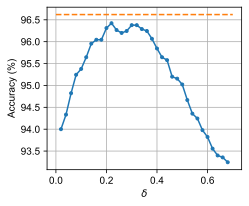

In [14]:
%config InlineBackend.figure_formats = ['svg']

plt.plot(delta_list[:len(acc_list)], np.array(acc_list)* 100, '.-')
plt.plot([0, 0.7], [96.62, 96.62], '--')
plt.ylabel('Accuracy (%)')
plt.xlabel('$\delta$')